# Derivatives of a TPS

In [1]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from menpo.shape import PointCloud
import menpo.io as mio
from menpofit.transform import DifferentiableThinPlateSplines

:0: FutureWarning: IPython widgets are experimental and may change in the future.


We start by defining the source and target landmarks. Notice that, in this first example source = target!!!

In [2]:
src_landmarks = PointCloud(np.array([[-1, -1],
                                     [-1,  1],
                                     [ 1, -1],
                                     [ 1,  1]]))

tgt_landmarks = PointCloud(np.array([[-1, -1],
                                     [-1,  1],
                                     [ 1, -1],
                                     [ 1,  1]]))

The warp can be effectively computed, although the rendering will not appear to be correct...

In [3]:
tps = DifferentiableThinPlateSplines(src_landmarks, tgt_landmarks)
np.allclose(tps.apply(src_landmarks).points, tgt_landmarks.points)

True

The next step is to define the set of points at which the derivative of the previous TPS warp must be evaluated. In this case, we use the function meshgrid to generate points inside the convex hull defined by the source landmarks.

In [4]:
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
xx, yy = np.meshgrid(x, y)
points = np.array([xx.flatten(1), yy.flatten(1)]).T

We evaluate the derivative, reshape the output, and visualize the result.

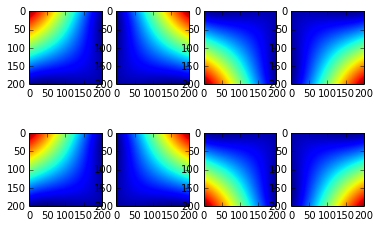

In [5]:
%matplotlib inline
dW_dxy = tps.d_dl(points)
reshaped = dW_dxy.reshape(xx.shape + (4,2))

#dW_dx
plt.subplot(241)
plt.imshow(reshaped[:,:,0,0])
plt.subplot(242)
plt.imshow(reshaped[:,:,1,0])
plt.subplot(243)
plt.imshow(reshaped[:,:,2,0])
plt.subplot(244)
plt.imshow(reshaped[:,:,3,0])

#dW_dy
plt.subplot(245)
plt.imshow(reshaped[:,:,0,1])
plt.subplot(246)
plt.imshow(reshaped[:,:,1,1])
plt.subplot(247)
plt.imshow(reshaped[:,:,2,1])
plt.subplot(248)
plt.imshow(reshaped[:,:,3,1])

If everything goes as expected, the upper corner of the images defining the derivative of the warp wrt the x and y coordinates of the first of the source landmarks should both contain values close to 1. 

In [6]:
print(reshaped[1:5,1:5,0,0])
print(reshaped[1:5,1:5,0,1])

[[ 0.99240803  0.98853625  0.98459474  0.98059178]
 [ 0.98853625  0.98468246  0.98075813  0.9767711 ]
 [ 0.98459474  0.98075813  0.97685217  0.97288316]
 [ 0.98059178  0.9767711   0.97288316  0.96893276]]
[[ 0.99240803  0.98853625  0.98459474  0.98059178]
 [ 0.98853625  0.98468246  0.98075813  0.9767711 ]
 [ 0.98459474  0.98075813  0.97685217  0.97288316]
 [ 0.98059178  0.9767711   0.97288316  0.96893276]]


The sum of all the derivatives wrt the x coordinates should produce an all 1 image

In [7]:
summed_x = np.sum(reshaped[:,:,:,0], axis=-1)
np.allclose(np.ones(xx.shape), summed_x)

True

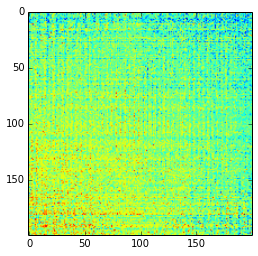

In [8]:
plt.imshow(summed_x)

and so should the sum of all derivatives wrt the y coordinates.

In [9]:
summed_y = np.sum(reshaped[:,:,:,1], axis=-1)
np.allclose(np.ones(xx.shape), summed_y)

True

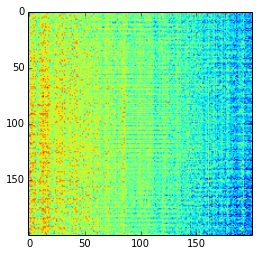

In [10]:
plt.imshow(summed_y)

Finally, the derivatives with respect to the x and y coordinates should be in this case exactly the same!!!

In [11]:
np.allclose(reshaped[:,:,:,0], reshaped[:,:,:,1])

True